<a href="https://colab.research.google.com/github/ar-umesh/Project-Finance-/blob/main/How_to_predict_trends_with_python_and_machine_learning_models_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance


In [ ]:
pip install neuralprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.4/145.4 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.5/829.5 kB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 78.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [ ]:
from neuralprophet import NeuralProphet
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# READ AND PREPROCESS THE DATA

In [ ]:
stock_symbol = 'GOOGL'
start_date = '2015-01-01'
end_date = '2024-01-01'
stock_data = yf.download(stock_symbol,start = start_date, end = end_date)
print(stock_data.head())
stock_data.to_csv('stock_data.csv')

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2015-01-02  26.629999  26.790001  26.393999  26.477501  26.477501  26480000
2015-01-05  26.357500  26.399500  25.887501  25.973000  25.973000  41182000
2015-01-06  26.025000  26.060499  25.277500  25.332001  25.332001  54456000
2015-01-07  25.547501  25.574499  25.182501  25.257500  25.257500  46918000
2015-01-08  25.075500  25.375000  24.750999  25.345501  25.345501  73054000


In [ ]:
stocks = pd.read_csv('stock_data.csv')
type(stocks['Date']) # here type of Date is float. We need to convert it into datetime format.

pandas.core.series.Series

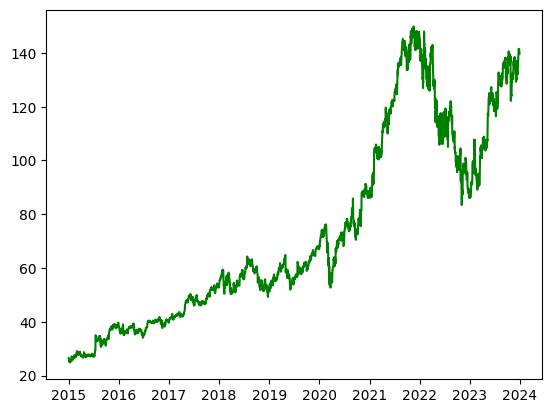

In [ ]:
stocks = pd.read_csv('stock_data.csv')
stocks['Date'] = pd.to_datetime(stocks['Date']) # convert the date to datetime format.
stocks = stocks[['Date', 'Close']]
stocks.columns= ['ds', 'y' ]  # change the column name(just for simplicity).
plt.plot(stocks['ds'], stocks['y'], label = 'actual', c='g')  # here c denotes colour.
plt.show()

In [ ]:
# TRAIN THE MODEL

In [ ]:
model = NeuralProphet()
model.fit(stocks)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
/usr/local/lib/python3.10/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.334% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.334% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO:NP.df_utils:Dataframe freq automatically defined as B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProp

Finding best initial lr:   0%|          | 0/234 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/configuration_validator.py:108: PossibleUserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
  rank_zero_warn(
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/trainer.py:1609: PossibleUserWarning: The number of training batches (36) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,205.621979,226.723679,1.321173,0.0,0
1,153.119324,175.011307,0.953953,0.0,1
2,101.051880,121.770592,0.591704,0.0,2
3,50.799728,67.168968,0.254190,0.0,3
4,16.973490,21.822025,0.049567,0.0,4
...,...,...,...,...,...
85,5.862914,8.999703,0.010036,0.0,85
86,5.863086,8.987443,0.010029,0.0,86
87,5.876646,8.971909,0.010129,0.0,87
88,5.928456,9.007210,0.010159,0.0,88


In [ ]:
# EVALUATE THE MODEL

In [ ]:
# first we will create future prediction using
future = model.make_future_dataframe(stocks, periods = 300) # 300 means 300 days in future
# now if we need to forecast then we need to use model.predict(Data)
forecast = model.predict(future) # future prediction
actual_prediction = model.predict(stocks) # past data predictions
print(future)
print(forecast)
print(actual_prediction)




/usr/local/lib/python3.10/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.334% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.334% of the data.
/usr/local/lib/python3.10/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)
/usr/local/lib/python3.10/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64

Predicting: 36it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
/usr/local/lib/python3.10/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.334% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.334% of the data.
/usr/local/lib/python3.10/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)
/usr/local/lib/python3.10/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future v

Predicting: 36it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


            ds     y
0   2024-01-01  None
1   2024-01-02  None
2   2024-01-03  None
3   2024-01-04  None
4   2024-01-05  None
..         ...   ...
295 2025-02-17  None
296 2025-02-18  None
297 2025-02-19  None
298 2025-02-20  None
299 2025-02-21  None

[300 rows x 2 columns]
            ds     y       yhat1      trend  season_yearly  season_weekly
0   2024-01-01  None  111.629410  89.736771      -0.952390      22.845022
1   2024-01-02  None  111.274002  89.718277      -1.084530      22.640251
2   2024-01-03  None  111.521271  89.699799      -1.203791      23.025270
3   2024-01-04  None  111.324020  89.681320      -1.309561      22.952261
4   2024-01-05  None  111.096634  89.662842      -1.401784      22.835575
..         ...   ...         ...        ...            ...            ...
295 2025-02-17  None  103.582184  82.103668      -1.414547      22.893049
296 2025-02-18  None  103.150192  82.085190      -1.524280      22.589283
297 2025-02-19  None  103.462860  82.066711      -1.636638

/usr/local/lib/python3.10/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.334% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.334% of the data.
/usr/local/lib/python3.10/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)
/usr/local/lib/python3.10/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64

Predicting: 36it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
/usr/local/lib/python3.10/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.334% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.334% of the data.
/usr/local/lib/python3.10/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)
/usr/local/lib/python3.10/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future v

Predicting: 36it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


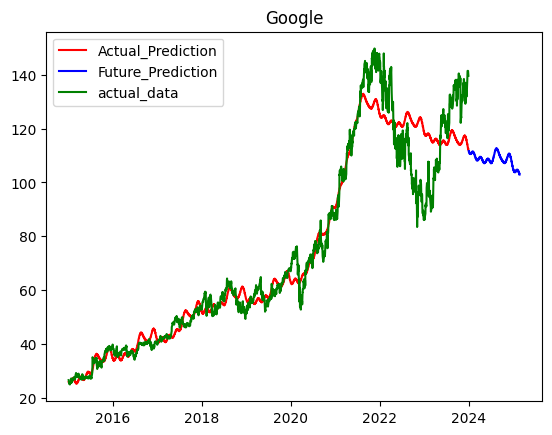

In [ ]:
# first we will create future prediction using
future = model.make_future_dataframe(stocks, periods = 300) # 300 means 300 days in future
# now if we need to forecast then we need to use model.predict(Data)
forecast = model.predict(future) # future prediction
actual_prediction = model.predict(stocks) # past data predictions
# we need to plotin the graph using plt
plt.plot(actual_prediction['ds'], actual_prediction['yhat1'], label = "Actual_Prediction", c ='r')
plt.plot(forecast['ds'], forecast['yhat1'], label = "Future_Prediction", c ='b')
plt.plot(stocks['ds'], stocks['y'], label = "actual_data", c ='g')
plt.legend()
plt.title('Google')
plt.show()


In [ ]:
# to find some outcome from the graph
model.plot_components(forecast)

WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 
/usr/local/lib/python3.10/dist-packages/neuralprophet/plot_forecast_plotly.py:283: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fcst = fcst.fillna(value=np.nan)
/usr/local/lib/python3.10/dist-packages/neuralprophet/plot_forecast_plotly.py:410: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

